# Visualisation de données avec Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
food = pd.read_csv("data/openfoodfacts_short.csv", sep=',')

In [3]:
food.head()

allergens           product_name  fat_100g  energy_100g  sugars_100g  \
0       NaN       Vitória crackers       7.0       1569.0         15.0   
1       NaN                  Cacao       NaN          NaN          NaN   
2       NaN                Sfiudwx       NaN          NaN          NaN   
3       NaN  Sauce Sweety chili 0%       0.0         88.0          0.4   
4       NaN              Mini coco       3.0        251.0          3.0   

   carbohydrates_100g  fiber_100g  proteins_100g  potassium_100g  
0                70.1         NaN            7.8             NaN  
1                 NaN         NaN            NaN             NaN  
2                 NaN         NaN            NaN             NaN  
3                 4.8         NaN            0.2             NaN  
4                10.0         NaN            2.0             NaN

In [4]:
food.describe()

fat_100g   energy_100g  sugars_100g  carbohydrates_100g  \
count  9260.000000   9306.000000  8605.000000         9279.000000   
mean     12.906479   1135.118364    16.128392           32.254750   
std      20.039768    930.284998    20.847648           28.799814   
min       0.000000      0.000000     0.000000            0.000000   
25%       0.000000    335.000000     1.600000            6.530000   
50%       3.850000   1117.000000     6.130000           22.860000   
75%      20.000000   1674.000000    24.710000           57.140000   
max     750.000000  39748.000000   100.000000          400.000000   

        fiber_100g  proteins_100g  potassium_100g  
count  6830.000000    9247.000000     1146.000000  
mean      2.972800       6.692809        0.322985  
std       4.793998       9.509092        0.549882  
min       0.000000       0.000000        0.000000  
25%       0.000000       0.000000        0.120250  
50%       1.600000       4.170000        0.185500  
75%       3.600000       9.330000        0.363500  
max      88.000000     400.000000       12.500000

## [Matplotlib](https://matplotlib.org/users/index.html)

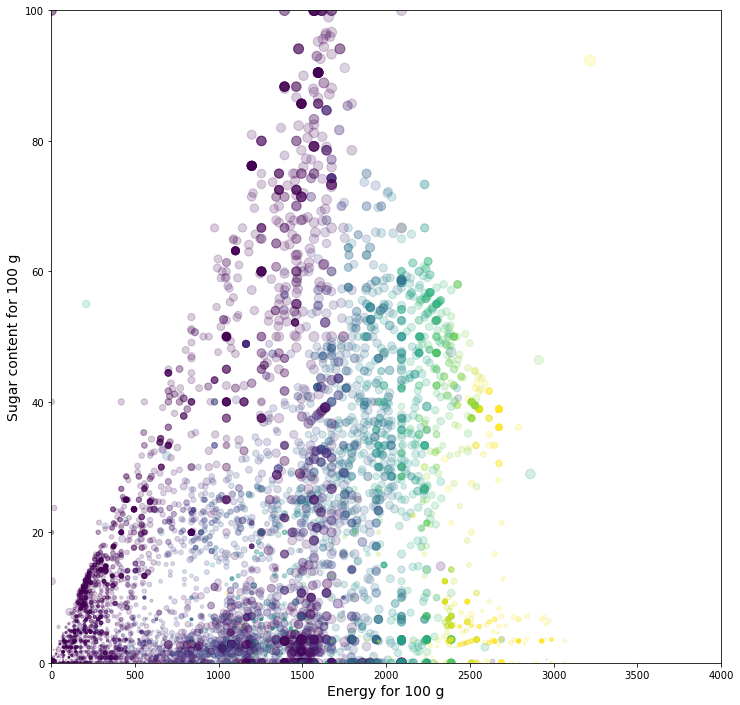

In [30]:
fig, ax = plt.subplots()

ax.scatter(
    food['energy_100g'],
    food['sugars_100g'],
    s=food['carbohydrates_100g'],
    c=food['fat_100g'].clip(0, 50),
    cmap="viridis",
    alpha=0.2
)
ax.set_xlabel("Energy for 100 g", fontsize=14)
ax.set_ylabel("Sugar content for 100 g", fontsize=14)
#ax.set_xscale("log")
#ax.set_xlim(10, 10000)
ax.set_xlim(0, 4000)
ax.set_ylim(0, 100)

fig.set_size_inches(12, 12)

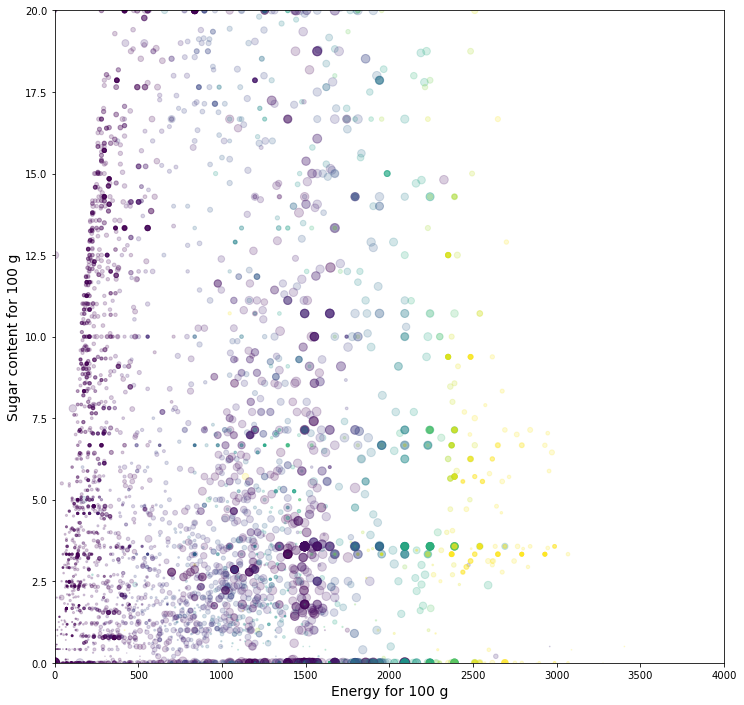

In [31]:
fig, ax = plt.subplots()

ax.scatter(
    food['energy_100g'],
    food['sugars_100g'],
    s=food['carbohydrates_100g'],
    c=food['fat_100g'].clip(0, 50),
    cmap="viridis",
    alpha=0.2
)
ax.set_xlabel("Energy for 100 g", fontsize=14)
ax.set_ylabel("Sugar content for 100 g", fontsize=14)
#ax.set_xscale("log")
#ax.set_xlim(10, 10000)
ax.set_xlim(0, 4000)
ax.set_ylim(0, 20)

fig.set_size_inches(12, 12)

## [Plotly / Dash](https://dash.plot.ly/)



[Démo](https://dash-gallery.plotly.host/dash-svm)
[Code source](https://github.com/plotly/dash-sample-apps/tree/master/apps/dash-svm)


## [Bokeh](https://bokeh.pydata.org/en/latest/docs/user_guide.html)

In [32]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

In [33]:
output_notebook()

Loading BokehJS ...

In [39]:
TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

x = food['energy_100g']
y = food['sugars_100g']
food['radii'] = food['fat_100g'].clip(0, 100)/20
food['colors'] = food['carbohydrates_100g'] / food['carbohydrates_100g'].max()

TOOLTIPS=[
    ("Product", "@product_name"),
    ("Carbohydrates", "@carbohydrates_100g"),
]
source = ColumnDataSource(data=food)
# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0, 100), y_range=(0, 6000), tooltips=TOOLTIPS)

# add a circle renderer with vectorized colors and sizes
p.circle(
    x='fat_100g',
    y='energy_100g',
    radius='radii',
    fill_alpha=0.2,
    line_color=None,
    #fill_color="carbohydrates_100g",
    source=source
)

# show the results
show(p)

## [Altair](https://altair-viz.github.io/getting_started/starting.html)

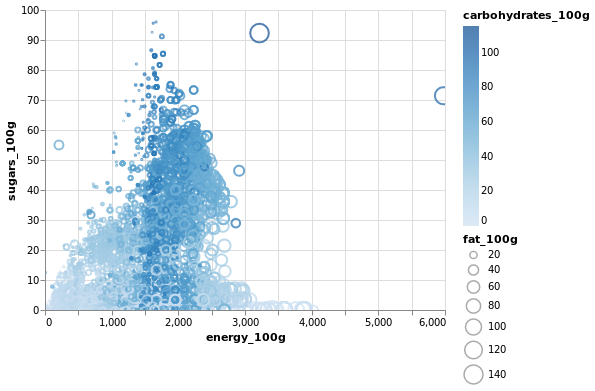

In [43]:
import altair as alt
alt.renderers.enable('notebook')

# See https://altair-viz.github.io/user_guide/faq.html?highlight=large%20dataset#maxrowserror-how-can-i-plot-large-datasets
alt.data_transformers.disable_max_rows()

source = food#.iloc[:4500]

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point(clip=True).encode(
    x=alt.X('energy_100g', scale=alt.Scale(domain=(0, 6000))),
    y=alt.Y('sugars_100g', scale=alt.Scale(domain=(0, 100))),
    tooltip=['product_name'],
    color='carbohydrates_100g',
    size='fat_100g'
)


points

# Concours du graphique le plus moche

## Temporal file

In [5]:
def read_temp_file(file_name):
    pd.options.mode.chained_assignment = None
    try:
        tab_ = pd.read_csv(file_name, delim_whitespace=True, skiprows=[0,1,3,4])
        tab = tab_[tab_.columns[:-1]]
        tab.columns = tab_.columns[1:]
        return tab
    except OSError as e:
        print(e)


th = read_temp_file('ifpen_data/thermo_region0.out')  # reading temporal file
th.head()  # print first 5 lines

Crank  Pressure  Max_Pres  Min_Pres  Mean_Temp   Max_Temp   Min_Temp  \
0  1760.0039  0.103412  0.103601  0.096541  540.23339  936.35765  373.31366   
1  1760.1008  0.103291  0.103503  0.096379  539.86809  934.06933  373.22070   
2  1760.2171  0.103146  0.103369  0.095494  539.43093  931.20807  373.10962   
3  1760.3136  0.103027  0.104178  0.096158  539.07105  929.43541  373.00887   
4  1760.4102  0.102909  0.103784  0.095325  538.71327  928.05584  372.89816   

     Volume      Mass   Density  Integrated_HR  HR_Rate        C_p        C_v  \
0  0.000103  0.000068  0.662882      1183.5114      0.0  1086.7855  798.11850   
1  0.000103  0.000068  0.662553      1183.5114      0.0  1086.6948  798.02768   
2  0.000103  0.000068  0.662160      1183.5114      0.0  1086.5868  797.91944   
3  0.000102  0.000068  0.661837      1183.5114      0.0  1086.4980  797.83042   
4  0.000102  0.000067  0.661518      1183.5114      0.0  1086.4097  797.74199   

      Gamma  Kin_Visc  Dyn_Visc  
0  1.361684  0.000043  0.000028  
1  1.361726  0.000043  0.000028  
2  1.361775  0.000043  0.000028  
3  1.361816  0.000043  0.000028  
4  1.361856  0.000043  0.000028

In [6]:
from pandas.plotting import scatter_matrix

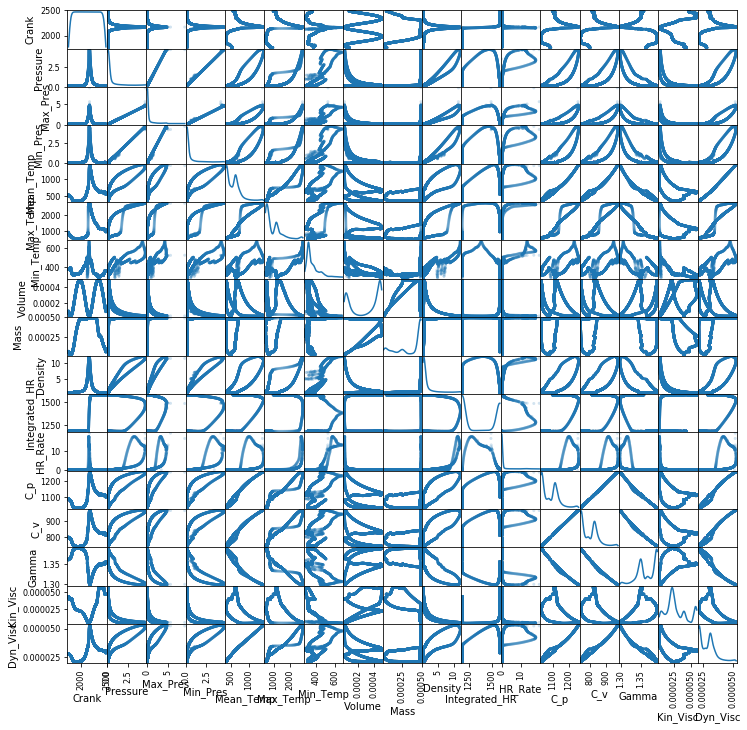

In [9]:
axes = scatter_matrix(th, alpha=0.2, diagonal="kde", figsize=(12, 12))

# Outils 3D

In [ ]:
from mayavi import mlab
mlab.init_notebook()


In [1]:
import ipyvolume as ipv

